In [1]:
import numpy as np
import keras
import pandas

from IPython.display import SVG
from IPython.display import display
from keras.utils.vis_utils import model_to_dot
from sympy import *

init_printing(use_latex=True)
import matplotlib.pyplot as plt
%matplotlib inline

"""
Attribute Information:

0: Nothing in hand; not a recognized poker hand
1: One pair; one pair of equal ranks within five cards
2: Two pairs; two pairs of equal ranks within five cards
3: Three of a kind; three equal ranks within five cards
4: Straight; five cards, sequentially ranked with no gaps
5: Flush; five cards with the same suit
6: Full house; pair + different rank three of a kind
7: Four of a kind; four equal ranks within five cards
8: Straight flush; straight + flush
9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush


10 target classes.
"""

/home/csci4850/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


'\nAttribute Information:\n\n0: Nothing in hand; not a recognized poker hand\n1: One pair; one pair of equal ranks within five cards\n2: Two pairs; two pairs of equal ranks within five cards\n3: Three of a kind; three equal ranks within five cards\n4: Straight; five cards, sequentially ranked with no gaps\n5: Flush; five cards with the same suit\n6: Full house; pair + different rank three of a kind\n7: Four of a kind; four equal ranks within five cards\n8: Straight flush; straight + flush\n9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush\n\n\n10 target classes.\n'

In [2]:
"""
https://archive.ics.uci.edu/ml/datasets/Poker+Hand
"""

"""
#you will prob have to change path location to load data.
train_path = os.path.join("data","poker-hand-training-true.data")
test_path = os.path.join("data","poker-hand-testing.data")
"""

train_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"
test_path = "http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data"


#setting attribute info, column names for data set. 
# S1 refers to Suit of card #1
# C1 refers to Rank of card #1 and so on.
# see data set attributes (poker-hand.names)
column = ['S1', 'C1', 'S2', 'C2', 'S3','C3','S4','C4','S5','C5','class']
suit = ['S1','S2','S3','S4','S5']
rank = ['C1','C2','C3','C4','C5']
_class = ['class']


#labeling
poker_train = (pandas.read_table(train_path,names=column,
                            #delim_whitespace=True,
                            header=None,sep =','))
poker_tst = (pandas.read_table(test_path,names=column,
                            #delim_whitespace=True,
                            header=None,sep =','))

print(poker_train.shape,'train')
print(poker_tst.shape,'test')

#for each attribute of suit of cards we will convert var into category
#this will allow us to do one hot encoding / dummy encoding later on
for i in suit:
    poker_train[i] = poker_train[i].astype('category')
    poker_tst[i] = poker_tst[i].astype('category')
    
# suits are now one hot encoded
poker_train = pandas.get_dummies(poker_train)
poker_tst = pandas.get_dummies(poker_tst)

print(poker_train.shape)

(25010, 11) train
(1000000, 11) test
(25010, 26)


In [3]:
#Building MODEL

#26 variables, also convert into category and do our one hot encoding.

X = np.array(poker_train.drop('class',axis=1))
#one hot encoding categorical values
#get_dummies creates dummy/indicator variables (1 or 0).
Y2 = pandas.get_dummies(poker_train['class'].astype('category'))
Y = np.array(Y2)

#2dims - 3dims
tempX = X[:,:,None]
tempY = Y[:,:,None]

tempX.reshape(X.shape[0],X.shape[1],1)
#temp.reshape(temp.shape[0],temp.shape[2],temp.shape[1])

tempY.reshape(Y.shape[0],Y.shape[1],1)


#validation set
test_X = np.array(poker_tst.drop('class',axis=1))
test_y2 = pandas.get_dummies(poker_tst['class'].astype('category'))
test_Y = np.array(test_y2)



model = keras.Sequential()
model.add(keras.layers.Conv1D(256, kernel_size=(8),
        activation='relu',input_shape=[tempX.shape[1],
        tempX.shape[2]]))
model.add(keras.layers.Conv1D(256, (2), activation='relu'))
model.add(keras.layers.MaxPooling1D(pool_size=(2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(tempY.shape[1], activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
        optimizer=keras.optimizers.Adam(),
        metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 18, 256)           2304      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 17, 256)           131328    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 8, 256)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               524544    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total para

In [4]:
batch_size = 100
epochs = 25
history = model.fit(tempX,Y,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_split=.33)

Train on 16756 samples, validate on 8254 samples
Epoch 1/25
16756/16756 [==============================] - 9s 521us/step - loss: 1.0253 - acc: 0.4915 - val_loss: 0.9637 - val_acc: 0.5344
Epoch 2/25
16756/16756 [==============================] - 7s 430us/step - loss: 0.9735 - acc: 0.5292 - val_loss: 0.9512 - val_acc: 0.5416
Epoch 3/25
16756/16756 [==============================] - 7s 420us/step - loss: 0.9505 - acc: 0.5445 - val_loss: 0.9387 - val_acc: 0.5351
Epoch 4/25
16756/16756 [==============================] - 7s 436us/step - loss: 0.9220 - acc: 0.5646 - val_loss: 0.9093 - val_acc: 0.5624
Epoch 5/25
16756/16756 [==============================] - 7s 416us/step - loss: 0.8965 - acc: 0.5861 - val_loss: 0.8982 - val_acc: 0.5797
Epoch 6/25
16756/16756 [==============================] - 7s 447us/step - loss: 0.8686 - acc: 0.6053 - val_loss: 0.8799 - val_acc: 0.5811
Epoch 7/25
16756/16756 [==============================] - 7s 441us/step - loss: 0.8385 - acc: 0.6253 - val_loss: 0.8073 - v

In [5]:
#   Model Accuracy
score = model.evaluate(tempX, Y, verbose=1)
print('Test loss:',score[0])
print('Test accuracy:',score[1])


25010/25010 [==============================] - 7s 281us/step
Test loss: 0.05553173646852166
Test accuracy: 0.9792483006797281


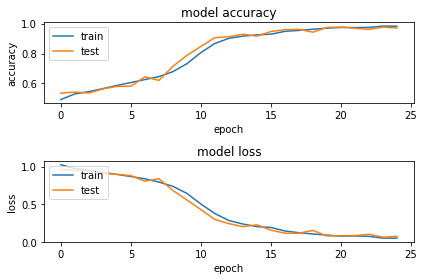

In [6]:
#   Plotting
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()